### Loading libraries 

In [113]:
library("tidyverse")
library("dplyr")
library("arm")
library("pscl")
library("ROCR")
library("data.table")

## Loading data

In [114]:
df.chi.more.hs <- read_csv("./data/df.chi.more.hs.csv")
df.chi.more.es <- read_csv("./data/df.chi.more.es.csv")
df.chi.more.ms <- read_csv("./data/df.chi.more.ms.csv")
df.chi.full.ms <- read_csv("./data/df.chi.full.ms.csv")
df.chi.full.es <- read_csv("./data/df.chi.full.es.csv")
df.chi.full.hs <- read_csv("./data/df.chi.full.hs.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  RCDTS = col_character(),
  Type = col_character(),
  School_Name.x = col_character(),
  District = col_character(),
  City.x = col_character(),
  County = col_character(),
  District_Type = col_character(),
  District_Size = col_character(),
  School_Type.x = col_character(),
  Grades_Served = col_character(),
  Summative_Designation = col_character(),
  State_Senate_District = col_integer(),
  State_Representative_District = col_integer(),
  Student_Enrollment_Total = col_integer(),
  Total_Number_of_School_Days = col_integer(),
  Avg_Class_Size_High_School = col_integer(),
  Avg_Class_Size_All_Grades = col_integer(),
  Avg_Number_of_days_of_Physical_Education_Per_Week_Per_Student = col_integer(),
  Principal_Turnover_within_6_Years = col_integer(),
  School_Name.y = col_character()
  # ... with 30 more columns
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_in

## prepliminary analysis

In [115]:
dim(glimpse(df.chi.more.es))

Observations: 455
Variables: 132
$ RCDTS                                                         <chr> "1501...
$ Type                                                          <chr> "Scho...
$ School_Name.x                                                 <chr> "Jack...
$ District                                                      <chr> "City...
$ City.x                                                        <chr> "Chic...
$ County                                                        <chr> "Cook...
$ District_Type                                                 <chr> "UNIT...
$ District_Size                                                 <chr> "LARG...
$ School_Type.x                                                 <chr> "ELEM...
$ Grades_Served                                                 <chr> "PK K...
$ Summative_Designation                                         <chr> "Comm...
$ State_Senate_District                                         <int> 14, 1...
$ State_Representat

[1] 455 132

### Elementary school 

In [116]:
dim(glimpse(df.chi.more.es))

Observations: 455
Variables: 132
$ RCDTS                                                         <chr> "1501...
$ Type                                                          <chr> "Scho...
$ School_Name.x                                                 <chr> "Jack...
$ District                                                      <chr> "City...
$ City.x                                                        <chr> "Chic...
$ County                                                        <chr> "Cook...
$ District_Type                                                 <chr> "UNIT...
$ District_Size                                                 <chr> "LARG...
$ School_Type.x                                                 <chr> "ELEM...
$ Grades_Served                                                 <chr> "PK K...
$ Summative_Designation                                         <chr> "Comm...
$ State_Senate_District                                         <int> 14, 1...
$ State_Representat

[1] 455 132

In [117]:
df.es.temp <- df.chi.more.es[,c(14,15,16,17,18,21,22,23,35,36,39,40,45,46,69,70,72,81,95,101,102,103,104,105,106,116,121,125,126,131,132)]

In [118]:
df.es.chart <- subset(df.es.temp, IS_CHARTER == 1)

In [119]:
glimpse(df.es.chart)

Observations: 51
Variables: 31
$ Student_Enrollment_Total                                      <int> 908, ...
$ Student_Enrollment_Low_Income_PC                              <dbl> 96.0,...
$ Student_Enrollment_Homeless_PC                                <dbl> NA, N...
$ Total_Number_of_School_Days                                   <int> 178, ...
$ Student_Attendance_Rate                                       <dbl> 95.6,...
$ Student_Chronic_Truancy_Rate                                  <dbl> 18.4,...
$ Avg_Class_Size_All_Grades                                     <int> 26, 2...
$ Min_per_Day_Math_Grade_3                                      <int> 90, 1...
$ Avg_Number_of_days_of_Physical_Education_Per_Week_Per_Student <int> 3, 0,...
$ Teacher_Retention_Rate                                        <dbl> 89.0,...
$ Chronic_Absenteeism                                           <dbl> 11.5,...
$ Chronic_Absenteeism_Low_Income                                <dbl> 11.5,...
$ Math_Proficiency_To

### Selecting subsets for elementary school (Considering numerics only)


In [120]:
library(leaps)
#reg_fit <- regsubsets(Math_Proficiency_Total_PC~., data = df.es.temp)
#summary(reg_fit)

### Fitting a model

In [121]:
fit <- lm(Math_Proficiency_Total_PC~IS_CHARTER+PC_of_Free_Eligibility+School_Survey_Involved_Families+Teacher_Retention_Rate+Avg_Class_Size_All_Grades+Chronic_Absenteeism,data = df.chi.more.ms)
summary(fit)


Call:
lm(formula = Math_Proficiency_Total_PC ~ IS_CHARTER + PC_of_Free_Eligibility + 
    School_Survey_Involved_Families + Teacher_Retention_Rate + 
    Avg_Class_Size_All_Grades + Chronic_Absenteeism, data = df.chi.more.ms)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.885  -5.518  -1.123   4.541  44.509 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      33.65003    7.97842   4.218 3.10e-05 ***
IS_CHARTER                       -8.27418    6.71504  -1.232  0.21866    
PC_of_Free_Eligibility          -49.61652    3.38813 -14.644  < 2e-16 ***
School_Survey_Involved_Families   1.45715    0.74432   1.958  0.05101 .  
Teacher_Retention_Rate            0.20320    0.07608   2.671  0.00790 ** 
Avg_Class_Size_All_Grades         0.19959    0.06631   3.010  0.00279 ** 
Chronic_Absenteeism              -0.39619    0.07200  -5.503 6.97e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Resi

In [123]:
-8.27418-49.61652+1.45715+0.20320+0.19959-0.39619


[1] -56.42695

In [124]:
7.97842+ 6.71504+ 3.38813+0.74432+0.07608+0.06631+0.07200

[1] 19.0403

In [125]:
56.42695/19.0403

[1] 2.963554

In [126]:
qt(.975,367)

[1] 1.966449

#### Residuals are distributed along the mean value

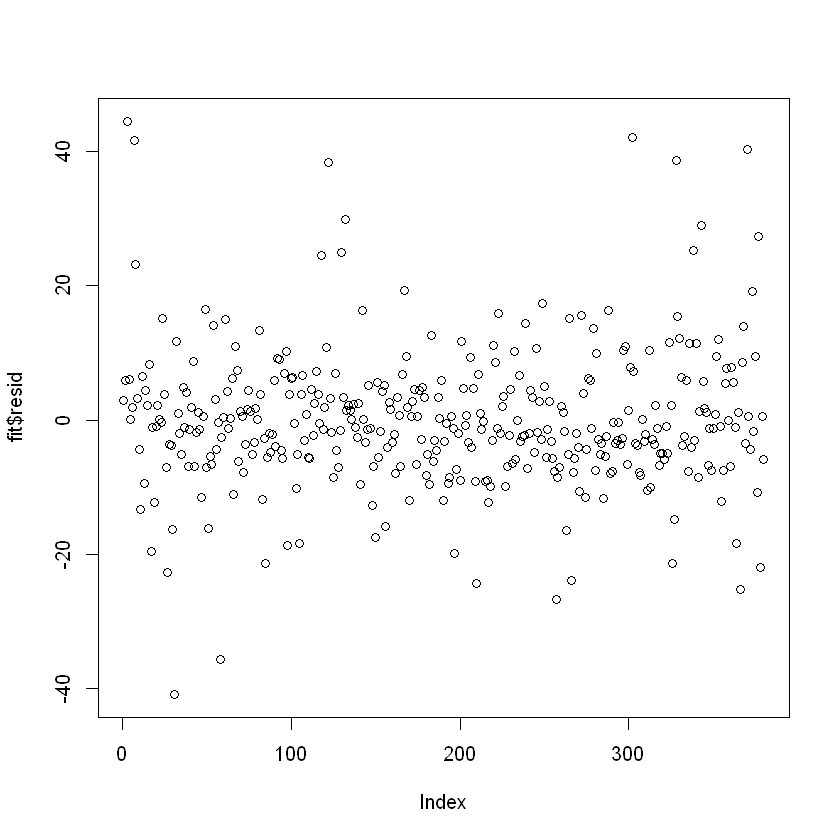

In [127]:

#boxplot(fit$resid)
plot(fit$resid)

In [128]:
anova(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
IS_CHARTER,1,130.8821,130.8821,1.179301,2.781997e-01
PC_of_Free_Eligibility,1,56167.5570,56167.5570,506.092408,1.977447e-71
School_Survey_Involved_Families,1,1766.7423,1766.7423,15.919063,7.959370e-05
Teacher_Retention_Rate,1,1265.0220,1265.0220,11.398360,8.124087e-04
Avg_Class_Size_All_Grades,1,1661.2671,1661.2671,14.968689,1.289860e-04
Chronic_Absenteeism,1,3360.3336,3360.3336,30.277965,6.970068e-08
Residuals,373,41396.5878,110.9828,NA,NA


In [129]:
qf(.95,1,373)

[1] 3.86651

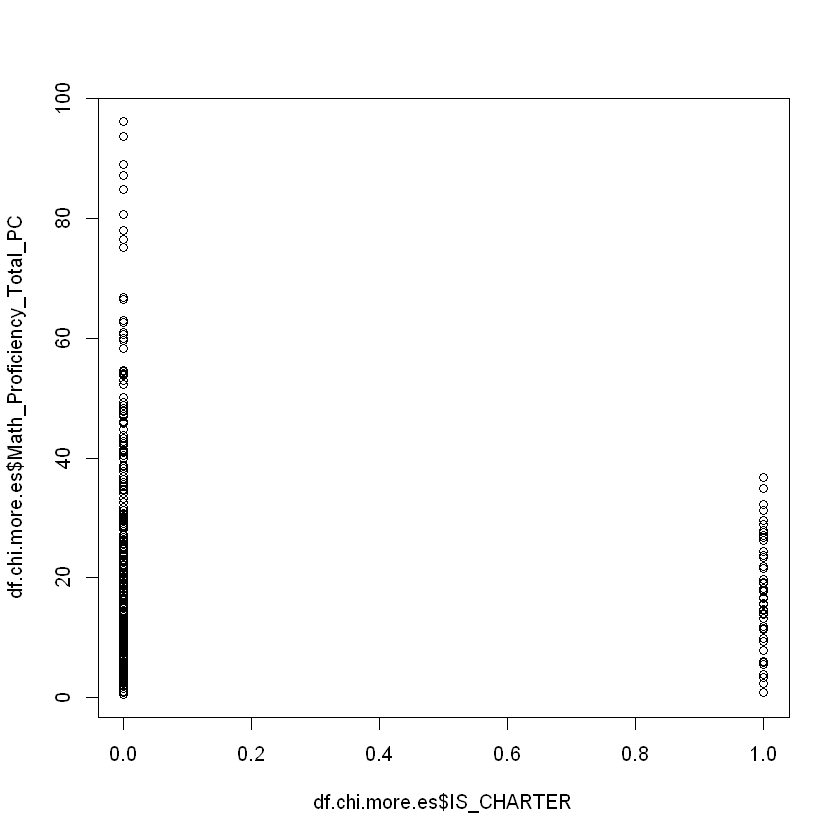

In [130]:
plot(df.chi.more.es$IS_CHARTER,df.chi.more.es$Math_Proficiency_Total_PC)

In [132]:
df.chi.full.es.nocharter <- df.chi.full.es[which(df.chi.full.es$IS_CHARTER==0),]

In [189]:
best3 <-
    regsubsets(Math_Proficiency_Total_PC ~ IS_CHARTER + Student_Enrollment_Low_Income_PC + School_Survey_Involved_Families + Teacher_Retention_Rate + Teacher_Attendance_Avg_Pct + Avg_Class_Size_All_Grades + Avg_Number_of_days_of_Physical_Education_Per_Week_Per_Student + School_Survey_Safety + Chronic_Absenteeism,
               data = df.chi.full.es,
               nbest = 3,       # 1 best model for each number of predictors
               nvmax = NULL,    # NULL for no limit on number of variables
               force.in = NULL, force.out = NULL,
               method=c("seqrep","forward","backward","exhaustive"))
report3 <- summary(best3)
report3rn <- rownames(report3$outmat)
report3df <- cbind(as.data.frame(report3$outmat),as.numeric(substr(report3rn,1,1)),report3$adjr2)
colnames(report3df)<- c("X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9" ,"n", "adjR2")
report3dfs <- report3df[order(-report3df$adjR2),]
report3dfs

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"1  linear dependencies found"

Reordering variables and trying again:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,n,adjR2
6 ( 1 ),,*,*,*,,*,*,,*,6,0.6273477
6 ( 2 ),,*,,*,,*,*,*,*,6,0.6268228
8 ( 1 ),*,*,*,*,,*,*,*,*,8,0.6264997
6 ( 3 ),,*,*,*,,*,,*,*,6,0.6263584
5 ( 1 ),,*,,*,,*,,*,*,5,0.6260796
5 ( 2 ),,*,*,*,,*,,,*,5,0.6259217
5 ( 3 ),,*,,*,,*,*,,*,5,0.6253731
4 ( 1 ),,*,,*,,*,,,*,4,0.6244558
4 ( 2 ),,*,*,,,*,,,*,4,0.6240068
4 ( 3 ),,*,,,,*,,*,*,4,0.6231201


In [134]:
glmulti.lm.out <-
    glmulti(Math_Proficiency_Total_PC ~ IS_CHARTER + PC_of_Free_Eligibility + School_Survey_Involved_Families + Teacher_Retention_Rate + Avg_Class_Size_All_Grades + Avg_Number_of_days_of_Physical_Education_Per_Week_Per_Student + School_Survey_Safety + Chronic_Absenteeism,
            data = df.chi.full.es,
            level = 1,               # No interaction considered
            method = "h",            # Exhaustive approach
            crit = "bic",            # AIC as criteria
            confsetsize = 5,         # Keep 5 best models
            plotty = T, report = T,  # No plot or interim reports
            fitfunction = "lm")      # lm function

## Show 5 best models (Use @ instead of $ for an S4 object)
glmulti.lm.out@formulas

ERROR: Error in glmulti(Math_Proficiency_Total_PC ~ IS_CHARTER + PC_of_Free_Eligibility + : could not find function "glmulti"


In [190]:
lm1 <- lm(Math_Proficiency_Total_PC ~ IS_CHARTER+PC_of_Free_Eligibility + School_Survey_Involved_Families + Teacher_Retention_Rate + Avg_Class_Size_All_Grades + School_Survey_Safety + Chronic_Absenteeism,
            data = df.chi.full.es)
anova(lm1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
IS_CHARTER,1,326.4994,326.4994,3.053335,8.140793e-02
PC_of_Free_Eligibility,1,58285.5057,58285.5057,545.070449,1.518184e-74
School_Survey_Involved_Families,1,1987.9975,1987.9975,18.591221,2.083872e-05
Teacher_Retention_Rate,1,1218.5002,1218.5002,11.395088,8.151032e-04
Avg_Class_Size_All_Grades,1,1920.9188,1920.9188,17.963918,2.851509e-05
School_Survey_Safety,1,577.1270,577.1270,5.397137,2.071572e-02
Chronic_Absenteeism,1,3769.4548,3769.4548,35.250932,6.721913e-09
Residuals,367,39244.0659,106.9321,NA,NA


In [205]:
summary(lm1)


Call:
lm(formula = Math_Proficiency_Total_PC ~ IS_CHARTER + PC_of_Free_Eligibility + 
    School_Survey_Involved_Families + Teacher_Retention_Rate + 
    Avg_Class_Size_All_Grades + School_Survey_Safety + Chronic_Absenteeism, 
    data = df.chi.full.es)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.451  -5.356  -0.729   4.995  42.512 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      34.38877    7.71823   4.456 1.11e-05 ***
IS_CHARTER                      -13.05910    5.97137  -2.187  0.02938 *  
PC_of_Free_Eligibility          -46.87737    3.47580 -13.487  < 2e-16 ***
School_Survey_Involved_Families   0.87466    0.79844   1.095  0.27404    
Teacher_Retention_Rate            0.18482    0.07054   2.620  0.00916 ** 
Avg_Class_Size_All_Grades         0.21138    0.06587   3.209  0.00145 ** 
School_Survey_Safety              0.92201    0.57712   1.598  0.11099    
Chronic_Absenteeism              -0.52159   

In [191]:
lm2 <- lm(Math_Proficiency_Total_PC ~ IS_CHARTER+Student_Enrollment_Low_Income_PC + School_Survey_Involved_Families + Teacher_Retention_Rate + Avg_Class_Size_All_Grades + School_Survey_Safety + Chronic_Absenteeism,
            data = df.chi.full.es)
anova(lm2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
IS_CHARTER,1,326.4994,326.4994,3.036266,8.226063e-02
Student_Enrollment_Low_Income_PC,1,58585.6111,58585.6111,544.814233,1.598657e-74
School_Survey_Involved_Families,1,1707.1785,1707.1785,15.875829,8.159570e-05
Teacher_Retention_Rate,1,882.0275,882.0275,8.202375,4.424003e-03
Avg_Class_Size_All_Grades,1,1922.1763,1922.1763,17.875191,2.981084e-05
School_Survey_Safety,1,389.3767,389.3767,3.620991,5.783721e-02
Chronic_Absenteeism,1,4052.5200,4052.5200,37.686226,2.157640e-09
Residuals,367,39464.6798,107.5332,NA,NA


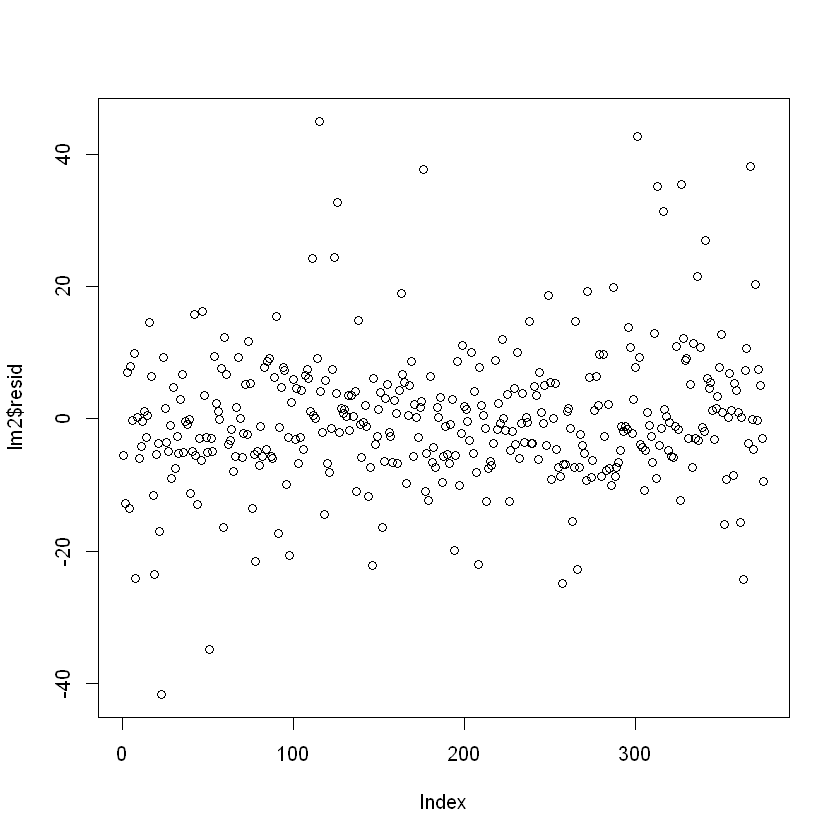

In [192]:
plot(lm2$resid)

In [178]:
library(leaps)
summary.out <- summary(regsubsets.out)
as.data.frame(summary.out$outmat)

report3df <- cbind(as.data.frame(report3$outmat),as.numeric(substr(report3rn,1,1)),report3$adjr2)
colnames(report3df)<- c("X1", "X2", "X3", "X1X2", "X1X3", "X2X3", "X12", "X22", "X32", "n", "adjR2")
report3dfs <- report3df[order(-report3df$adjR2),]

ERROR: Error in summary(regsubsets.out): object 'regsubsets.out' not found


### Residuals

### Needed constancy of error variance test


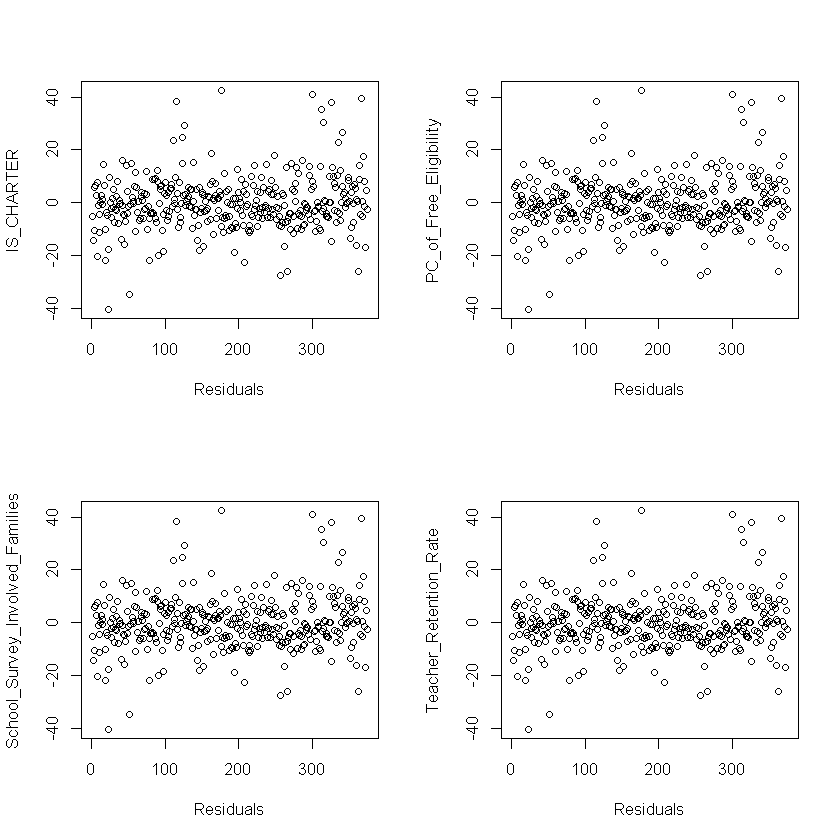

In [291]:
par(mfrow = c(2, 2))
#plot(lm1$resid, lm1$fitted,  xlab = "Residuals", ylab = "Predicted Scores")
plot(lm1$resid, lm1$IS_CHARTER,  xlab = "Residuals", ylab = "IS_CHARTER")
plot(lm1$resid, lm1$PC_of_Free_Eligibility,  xlab = "Residuals", ylab = "PC_of_Free_Eligibility")
plot(lm1$resid, lm1$School_Survey_Involved_Families,  xlab = "Residuals", ylab = "School_Survey_Involved_Families")
plot(lm1$resid, lm1$Teacher_Retention_Rate,  xlab = "Residuals", ylab = "Teacher_Retention_Rate")
#plot(lm1$resid, lm1$Avg_Class_Size_All_Grades,  xlab = "Residuals", ylab = "Avg_Class_Size_All_Grades")
#plot(lm1$resid, lm1$School_Survey_Safety,  xlab = "Residuals", ylab = "School_Survey_Safety")
#plot(lm1$resid, lm1$Chronic_Absenteeism,  xlab = "Residuals", ylab = "Chronic_Absenteeism")

### Breusch Pagan Test - Constancy of Error Variance

In [207]:
install.packages("lmtest")
library("lmtest")
bptest(lm1, ~ IS_CHARTER+PC_of_Free_Eligibility + School_Survey_Involved_Families + Teacher_Retention_Rate + Avg_Class_Size_All_Grades + School_Survey_Safety + Chronic_Absenteeism, data = df.chi.full.es, studentize = TRUE)

#lm1 <- lm(Math_Proficiency_Total_PC ~ IS_CHARTER+PC_of_Free_Eligibility + School_Survey_Involved_Families + Teacher_Retention_Rate + Avg_Class_Size_All_Grades + School_Survey_Safety + Chronic_Absenteeism,data = df.chi.full.es)

Installing package into 'C:/Users/hmishra/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'lmtest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hmishra\AppData\Local\Temp\RtmpgfDMoQ\downloaded_packages


Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




	studentized Breusch-Pagan test

data:  lm1
BP = 86.447, df = 7, p-value = 6.626e-16


In [210]:
qchisq(.95, df=7) 

[1] 14.06714

### Residuals distribution 

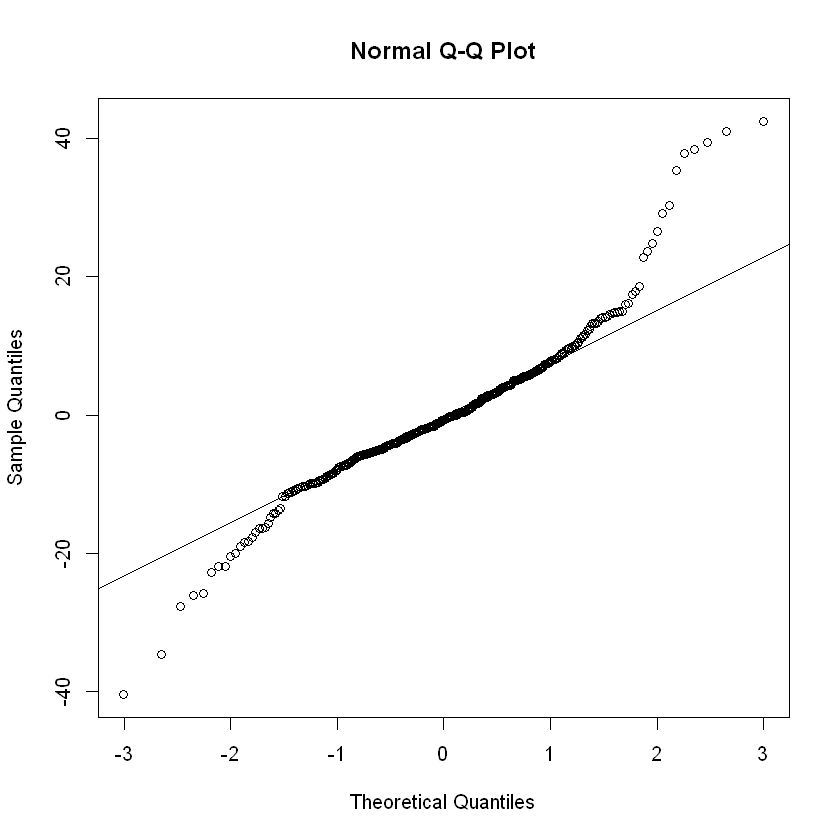

In [195]:
#par(mfrow = c(1, 2))
qqnorm(lm1$resid)
qqline(lm1$resid)

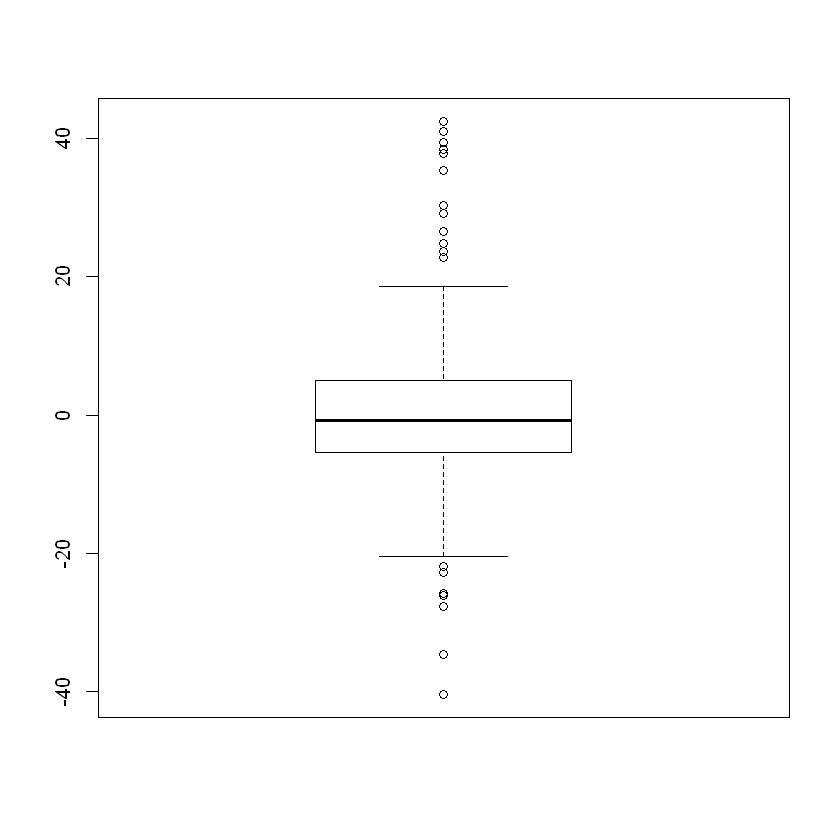

In [196]:
boxplot(lm1$resid)

In [197]:
remove_outliers <- function(x, na.rm = TRUE, ...) {
  qnt <- quantile(x, probs=c(.25, .75), na.rm = na.rm, ...)
  H <- 1.5 * IQR(x, na.rm = na.rm)
  y <- x
  y[x < (qnt[1] - H)] <- NA
  y[x > (qnt[2] + H)] <- NA
  y
}

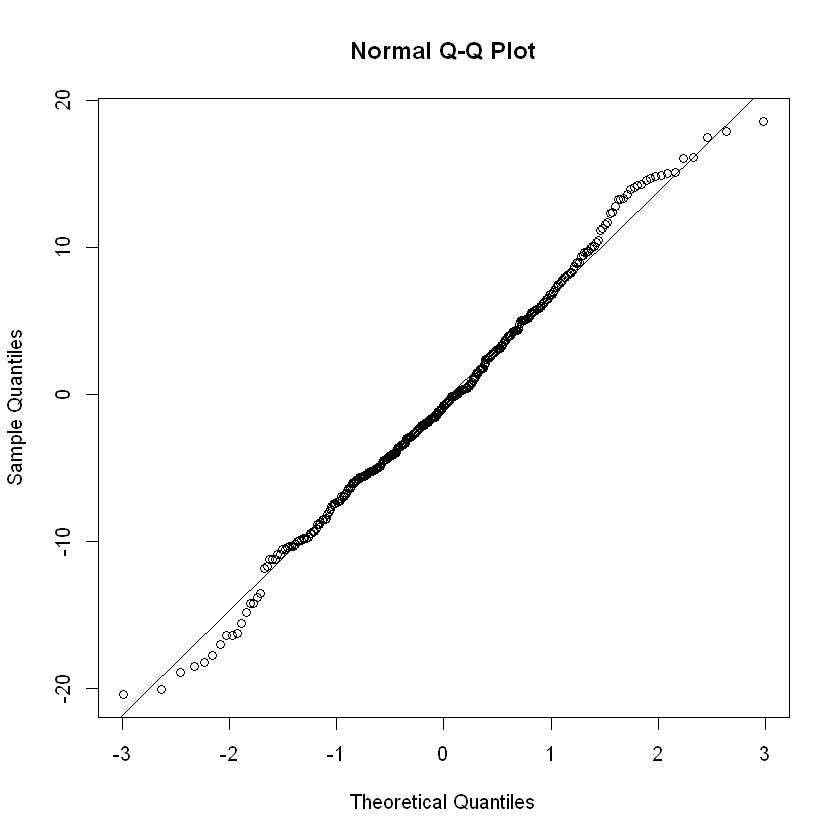

In [198]:
clean_resid<- remove_outliers(lm1$resid)
#boxplot(clean_resid)
qqnorm(clean_resid)
qqline(clean_resid)

In [199]:
#install.packages("car")
library("car")
vif(lm1)

IS_CHARTER          PC_of_Free_Eligibility 
                       1.319599                        1.572783 
School_Survey_Involved_Families          Teacher_Retention_Rate 
                       1.582418                        1.402769 
      Avg_Class_Size_All_Grades            School_Survey_Safety 
                       1.108489                        1.410589 
            Chronic_Absenteeism 
                       1.522846

### Transfromation : BOX CoX

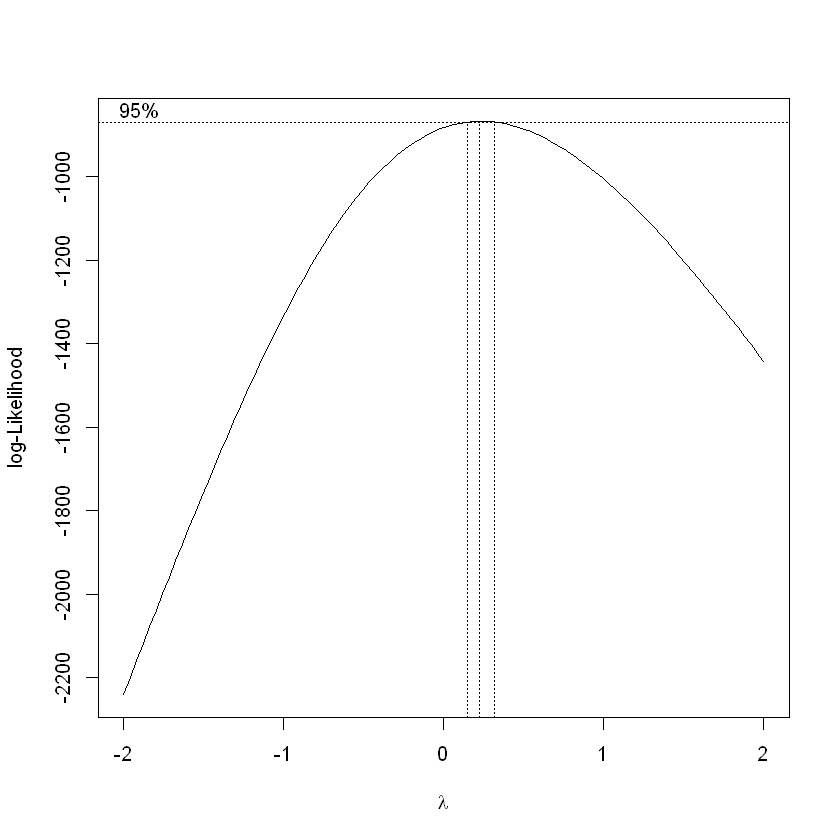

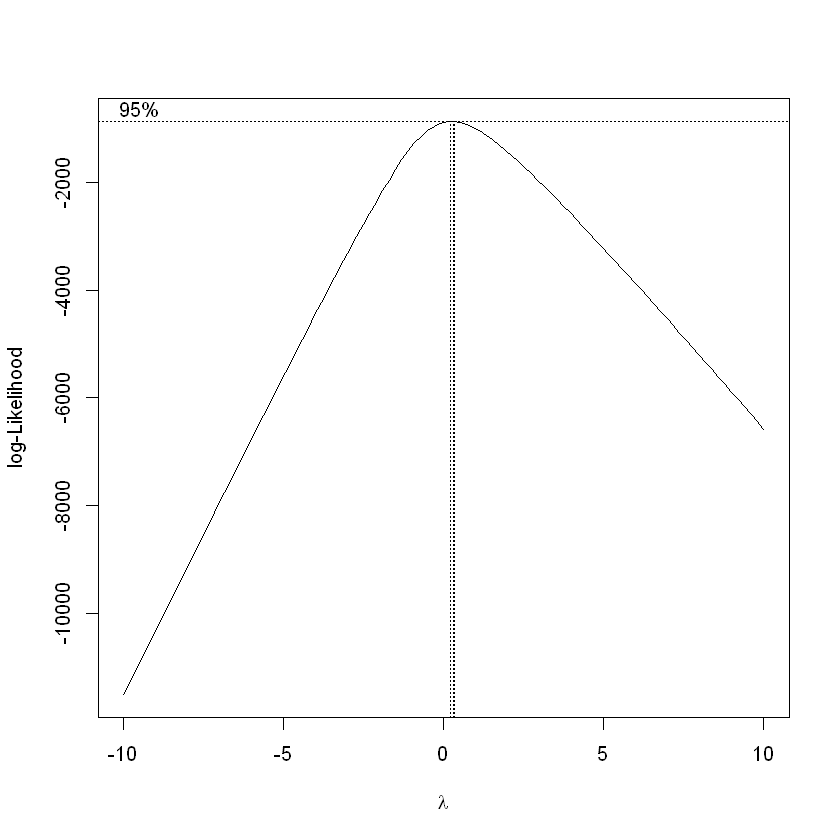

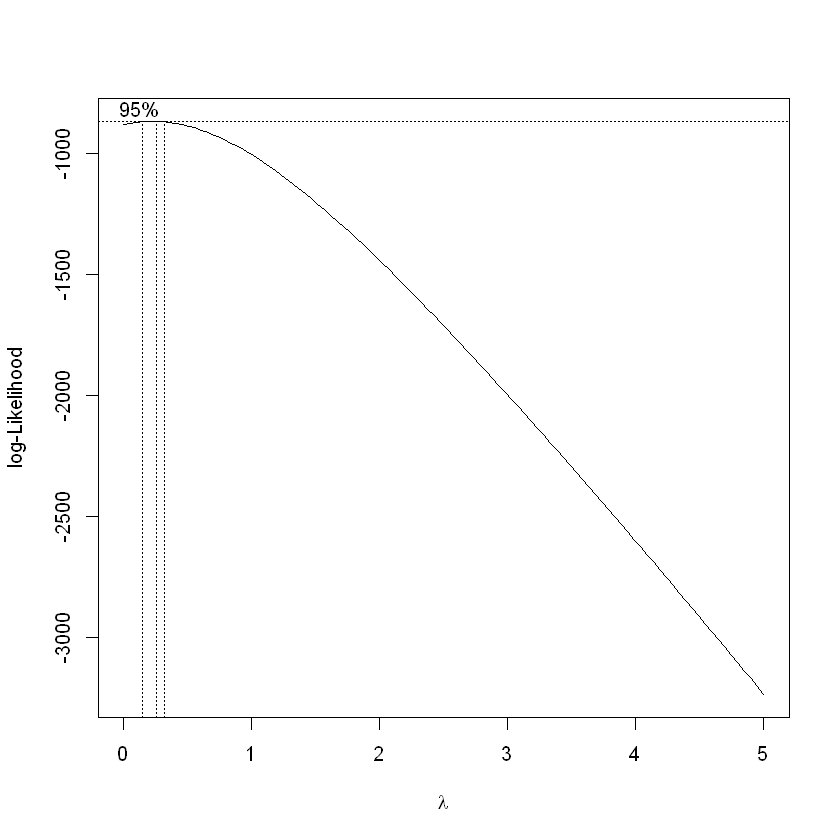

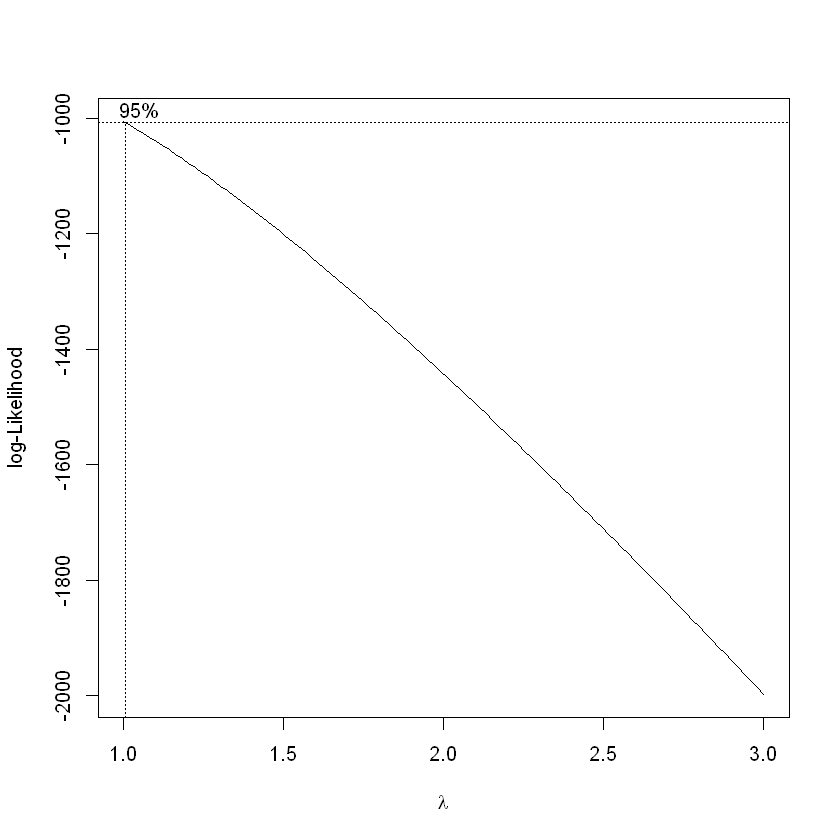

In [289]:
#transfrom.fit <- boxcox(Math_Proficiency_Total_PC ~ IS_CHARTER+PC_of_Free_Eligibility + School_Survey_Involved_Families + Teacher_Retention_Rate + Avg_Class_Size_All_Grades + School_Survey_Safety + Chronic_Absenteeism,data = df.chi.full.es)
#par(mfrow = c(1, 2))
boxcox(lm1)
boxcox(lm1, lambda=seq(-10,10))
boxcox(lm1, lambda=seq(0,5,0.1))
boxcox(lm1, lambda=seq(1,3,0.1))
#boxcox(lm1, lambda=seq(1,3,0.1))

### Model 2

In [290]:
transfromed_scores<- (df.chi.full.es$Math_Proficiency_Total_PC)^.33
#transfromed_scores
tranfromed.lm3 <- lm(transfromed_scores ~ IS_CHARTER+PC_of_Free_Eligibility + School_Survey_Involved_Families + Teacher_Retention_Rate + Avg_Class_Size_All_Grades + School_Survey_Safety + Chronic_Absenteeism,
            data = df.chi.full.es)
summary(tranfromed.lm3)



Call:
lm(formula = transfromed_scores ~ IS_CHARTER + PC_of_Free_Eligibility + 
    School_Survey_Involved_Families + Teacher_Retention_Rate + 
    Avg_Class_Size_All_Grades + School_Survey_Safety + Chronic_Absenteeism, 
    data = df.chi.full.es)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.54557 -0.25183 -0.00404  0.30831  1.09150 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      2.449447   0.308822   7.932 2.64e-14 ***
IS_CHARTER                      -0.313467   0.238927  -1.312   0.1903    
PC_of_Free_Eligibility          -1.497197   0.139074 -10.765  < 2e-16 ***
School_Survey_Involved_Families  0.047195   0.031947   1.477   0.1405    
Teacher_Retention_Rate           0.012961   0.002823   4.592 6.04e-06 ***
Avg_Class_Size_All_Grades        0.007795   0.002635   2.958   0.0033 ** 
School_Survey_Safety             0.039831   0.023092   1.725   0.0854 .  
Chronic_Absenteeism             -0.032738

### Contancy of error variance

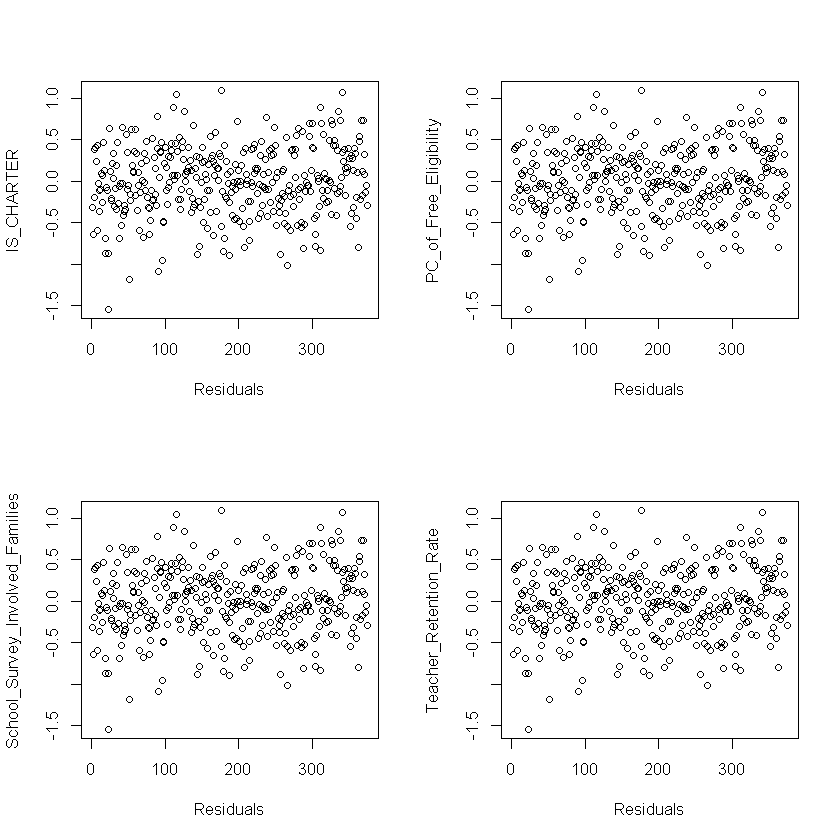

In [292]:
par(mfrow = c(2, 2))
#plot(tranfromed.lm3$resid, lm1$fitted,  xlab = "Residuals", ylab = "Predicted Scores")
plot(tranfromed.lm3$resid, lm1$IS_CHARTER,  xlab = "Residuals", ylab = "IS_CHARTER")
plot(tranfromed.lm3$resid, lm1$PC_of_Free_Eligibility,  xlab = "Residuals", ylab = "PC_of_Free_Eligibility")
plot(tranfromed.lm3$resid, lm1$School_Survey_Involved_Families,  xlab = "Residuals", ylab = "School_Survey_Involved_Families")
plot(tranfromed.lm3$resid, lm1$Teacher_Retention_Rate,  xlab = "Residuals", ylab = "Teacher_Retention_Rate")
#plot(tranfromed.lm3$resid, lm1$Avg_Class_Size_All_Grades,  xlab = "Residuals", ylab = "Avg_Class_Size_All_Grades")
#plot(tranfromed.lm3$resid, lm1$School_Survey_Safety,  xlab = "Residuals", ylab = "School_Survey_Safety")
#plot(tranfromed.lm3$resid, lm1$Chronic_Absenteeism,  xlab = "Residuals", ylab = "Chronic_Absenteeism")

## F test for constancy of error variance

In [293]:
#order(tranfromed.lm3$resid)

v <- sort(tranfromed.lm3$resid)
lower <- v[1:round(length(v)/2)] 
upper <- v[round((length(v)/2)+1):length(v)] 
write.csv(upper, file = "./data/upper.csv",row.names=FALSE)
write.csv(lower, file = "./data/lower.csv",row.names=FALSE)

In [294]:
((sum(upper))^2)/((sum(lower))^2)

[1] 0.9998666

Warning message in qf(188, 188, 0.95):
"NaNs produced"

[1] NaN

In [271]:
qf(0.95,7,360)

[1] 2.059914

## BP test

In [265]:
bptest(tranfromed.lm3, ~ IS_CHARTER+PC_of_Free_Eligibility + School_Survey_Involved_Families + Teacher_Retention_Rate + Avg_Class_Size_All_Grades + School_Survey_Safety + Chronic_Absenteeism, data = df.chi.full.es, studentize = TRUE)



	studentized Breusch-Pagan test

data:  tranfromed.lm3
BP = 12.386, df = 7, p-value = 0.08857


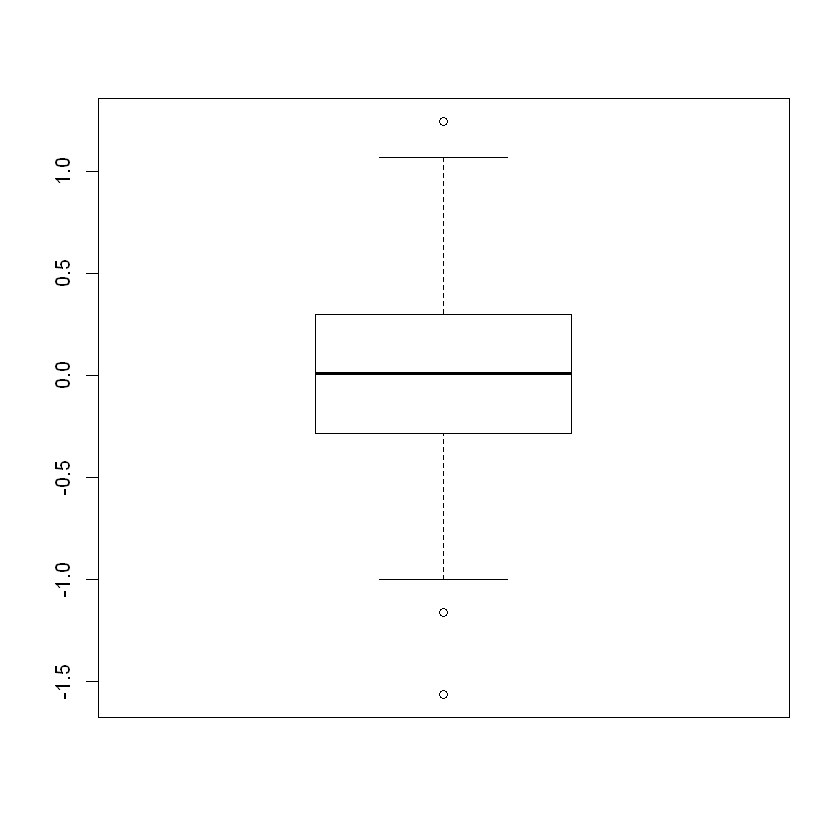

In [237]:
boxplot(tranfromed.lm3$resid)

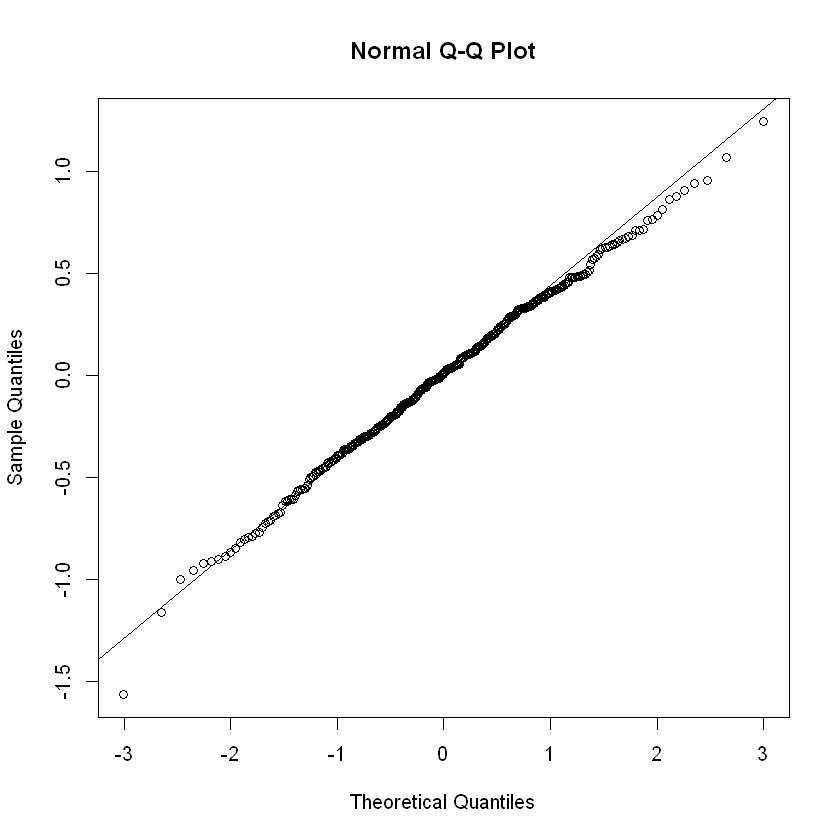

In [240]:
qqnorm(tranfromed.lm3$resid)
qqline(tranfromed.lm3$resid)

In [272]:
g <- goodfit(cc, method="MinChisq")
summary(g)

ERROR: Error in goodfit(cc, method = "MinChisq"): could not find function "goodfit"


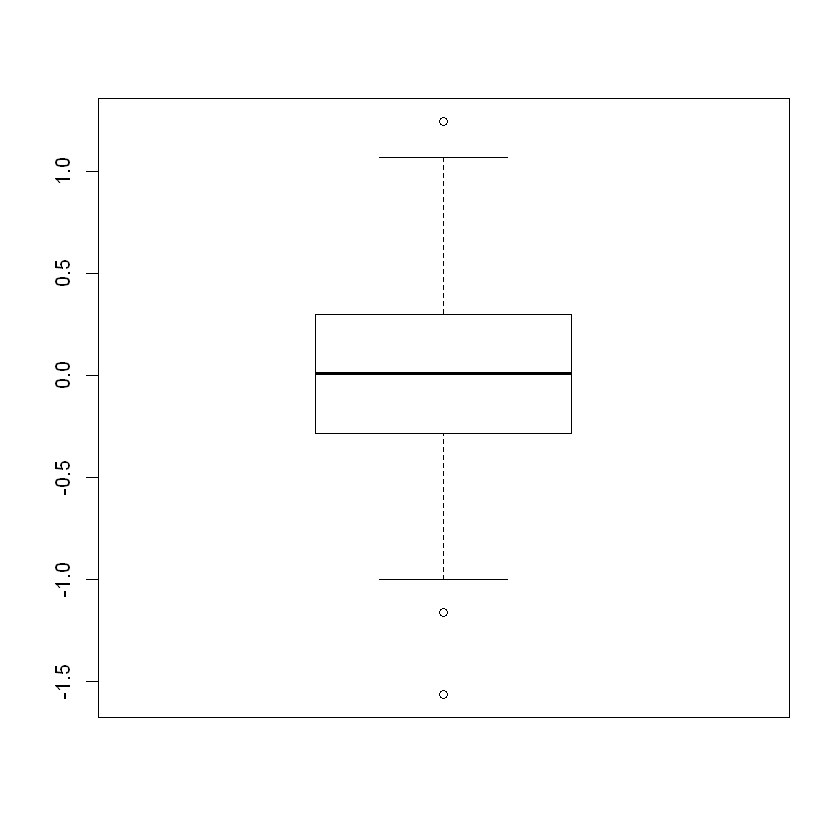

In [241]:
boxplot($resid)

## Outliers of Xi - Cook Distance

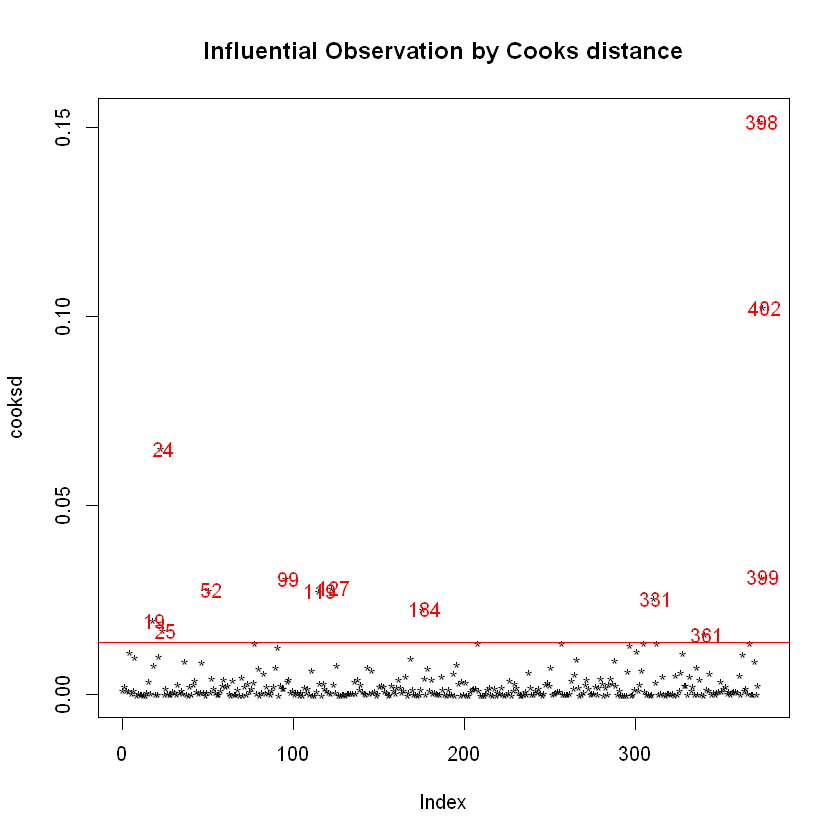

In [284]:
cooksd <- cooks.distance(tranfromed.lm3)
plot(cooksd, pch="*", cex=1, main="Influential Observation by Cooks distance")  # plot cook's distance
abline(h = 4*mean(cooksd, na.rm=T), col="red")  # add cutoff line
text(x=1:length(cooksd)+1, y=cooksd, labels=ifelse(cooksd>4*mean(cooksd, na.rm=T),names(cooksd),""), col="red")  # add labels

In [285]:
qf(.50,7,360)

[1] 0.908241

In [296]:
summary(tranfromed.lm3)


Call:
lm(formula = transfromed_scores ~ IS_CHARTER + PC_of_Free_Eligibility + 
    School_Survey_Involved_Families + Teacher_Retention_Rate + 
    Avg_Class_Size_All_Grades + School_Survey_Safety + Chronic_Absenteeism, 
    data = df.chi.full.es)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.54557 -0.25183 -0.00404  0.30831  1.09150 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      2.449447   0.308822   7.932 2.64e-14 ***
IS_CHARTER                      -0.313467   0.238927  -1.312   0.1903    
PC_of_Free_Eligibility          -1.497197   0.139074 -10.765  < 2e-16 ***
School_Survey_Involved_Families  0.047195   0.031947   1.477   0.1405    
Teacher_Retention_Rate           0.012961   0.002823   4.592 6.04e-06 ***
Avg_Class_Size_All_Grades        0.007795   0.002635   2.958   0.0033 ** 
School_Survey_Safety             0.039831   0.023092   1.725   0.0854 .  
Chronic_Absenteeism             -0.032738

## Variance Inflation Factor 

In [295]:
#install.packages("car")
library("car")
vif(tranfromed.lm3)

IS_CHARTER          PC_of_Free_Eligibility 
                       1.319599                        1.572783 
School_Survey_Involved_Families          Teacher_Retention_Rate 
                       1.582418                        1.402769 
      Avg_Class_Size_All_Grades            School_Survey_Safety 
                       1.108489                        1.410589 
            Chronic_Absenteeism 
                       1.522846